PROBLEM 2: Count the number of transections from MPESA per merchant (MERCHANT_NAME)

In [8]:
#IMPORT THE IMPORTANT LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt


#IMPORT THE DATAFRAME 

money_df = pd.read_csv("Money.csv")

money_df.head(3)

,MERCHANT_CATEGORIZED_AT,HOURS,MONTHS,MINUTES,YEAR,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,10,5,25,2022,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,16,10,18,2021,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,14,5,17,2022,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw


In [2]:
money_df.columns

Index(['MERCHANT_CATEGORIZED_AT', 'HOURS', 'MONTHS', 'MINUTES', 'YEAR',
       'MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS', 'PURCHASE_VALUE',
       'PURCHASED_AT', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE',
       'USER_GENDER', 'USER_HOUSEHOLD', 'USER_INCOME', 'USER_ID',
       'Transaction_ID'],
      dtype='object')

In [3]:
#PULL THE DATA TO BE USED
# We need number of transactions paid via MPESA sent money per merchant

#APPROACH: STEP 1
## Filter the transections paid via MPESA FIRST

mpesa_transactions_df = money_df[money_df["IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"] == True]

#print the rewuired columns MERCHANT_NAME and IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY

mpesa_transactions_df[["MERCHANT_NAME","IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"]]

,MERCHANT_NAME,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY
5,JOSEPH NTHENGE,True
12,ELIZABETH NYAMBURA,True
13,SAFARICOM POST,True
15,KPLC PREPAID,True
16,TABITHA RAORE,True
...,...,...
365,CEDRIC OCHOLA,True
367,NIMROD ZIRO,True
368,ONESMUS GAKURU,True
369,GLADWELL MBURU,True


In [17]:
#APPROACH: STEP 2
## Group the MERCHANT_NAME by IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY
#use count() to count the number of transactions per merchant

grouped_df = mpesa_transactions_df.groupby("MERCHANT_NAME")["IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY"].count()

grouped_df

MERCHANT_NAME
AGGREY  MWANGALE        1
ALBERT  MBOGO           2
ARNELLE OMONDI          1
AUDRINE  MAKAKA         1
BETH GICHU              1
                       ..
TELKOM KENYA LIMITED    4
TEOFILO LIGAWA          3
VENDIT LIMITED          3
VICTOR  WAWERU          1
WAFULA ANNE             1
Name: IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY, Length: 96, dtype: int64

In [24]:
#Remove all merchants with 1 Transaction

regrouped_df = grouped_df[grouped_df > 1]

regrouped_df

MERCHANT_NAME
ALBERT  MBOGO              2
CEDRIC OCHOLA              4
CHRISTINE OOKO             2
DENIS OTIENO               3
ELIZABETH NYAMBURA         5
EQUITY PAYBILL ACCOUNT     8
ERIC CHESI                 2
GLADWELL MBURU             2
IM BANK C2B                2
JACKSON ANDIVA             4
JERUSA A OTIENO            2
JERUSA OTIENO              4
JIMMIE WAIRIMU             2
JOSEPH NTHENGE             2
KPLC PREPAID               8
LEAH NGOGA                 7
MIKE  KOECH                2
ONESMUS  GAKURU            2
PESAPAL                    2
PETER KENDA               10
PETER NJOORA KENDA         3
RAPHAEL MWANGI             4
SAFARICOM POST             2
SAFARICOM POST PAID        5
SAMWEL  KIMANI             2
SAMWEL KIMANI              2
TELKOM KENYA LIMITED       4
TEOFILO LIGAWA             3
VENDIT LIMITED             3
Name: IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

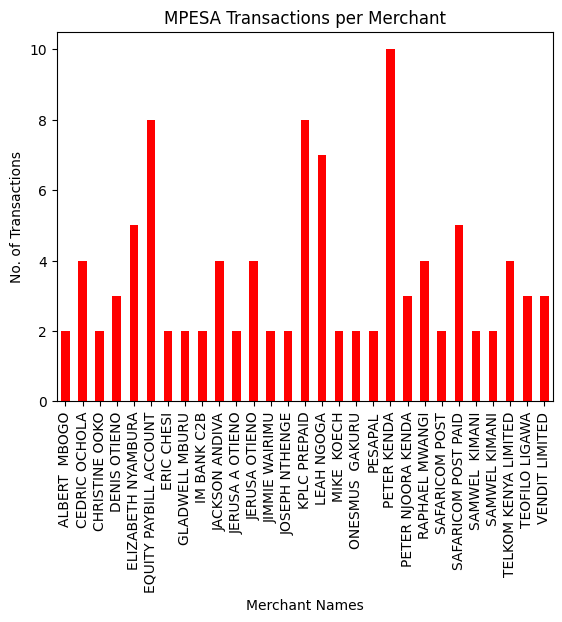

In [30]:
#Plotting a bar chart

regrouped_df.plot( kind = "bar", color = "red")
plt.title("MPESA Transactions per Merchant")
plt.ylabel("No. of Transactions")
plt.xlabel("Merchant Names")
plt.show